---
---

<h1><center><ins>Exercise Sheet 5</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, cos
import scipy
from scipy.integrate import simpson

## Exercise 1 - Numerical derivative

**(A)** Compute the derivative of the following two functions:

$$ f_1(x) = x^2 + \cos(x) $$

$$ f_2(x) = \exp(x) - x^3 $$

in correspondence of at least $N = 50$ values $x_i$ ($i = 1, ..., N$) of the variable $x$ in the interval $[1,5]$. To do this, *write your own code to compute the derivatives numerically*.

**(B)** Compare the resulting values you get for the numerical derivatives with the corresponding analytic solutions. Calculate the value of the quantity $q$ for each function:

$$ q = \sum_{i=1}^N \frac{\left[d_i - f'(x_i) \right]}{f'(x_i)} $$

where $d_i$ are the values you obtained for the numerical derivatives for each of the $N$ abscissas, and $f'(x_i)$ are the analytical derivatives evaluated in points $x_i$. How does the value of $q$ change when changing the value of $h$ to compute the derivatives numerically? How do the values of $q$ compare for the two functions? Discuss your findings.

[ 1.21905502  1.34398344  1.47491211  1.61205642  1.75559033  1.90564525
  2.06230918  2.22562607  2.39559558  2.57217306  2.75526985  2.94475387
  3.1404505   3.34214374  3.54957764  3.76245804  3.9804545   4.20320249
  4.43030585  4.6613394   4.8958518   5.13336852  5.37339504  5.61542011
  5.85891917  6.10335786  6.34819555  6.59288895  6.83689572  7.07967812
  7.32070655  7.5594631   7.79544496  8.02816785  8.25716915  8.48201106
  8.70228346  8.91760668  9.12763399  9.33205396  9.53059248  9.72301464
  9.90912623 10.0887751  10.26185214 10.42829199 10.58807351 10.74121991
 10.88779857 10.88779857] [-4.19248054e-01 -7.08118789e-01 -1.01648187e+00 -1.34259440e+00
 -1.68456523e+00 -2.04034233e+00 -2.40769918e+00 -2.78421983e+00
 -3.16728288e+00 -3.55404392e+00 -3.94141663e+00 -4.32605217e+00
 -4.70431685e+00 -5.07226791e+00 -5.42562725e+00 -5.75975286e+00
 -6.06960791e+00 -6.34972714e+00 -6.59418045e+00 -6.79653331e+00
 -6.94980392e+00 -7.04641662e+00 -7.07815137e+00 -7.03608898e+00


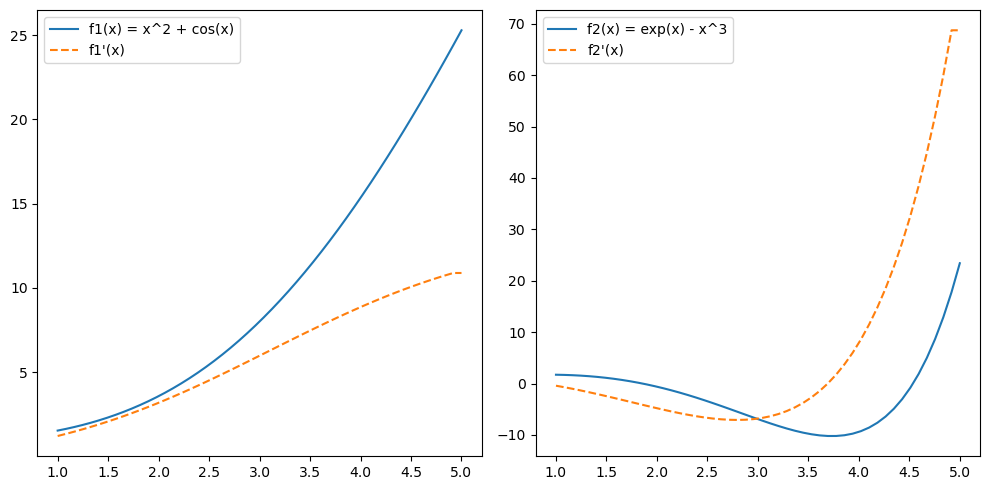

In [3]:
N = 50
x_values = np.linspace(1,5, N)

dx = x_values[1] - x_values[0]
def f1(x):
    return x**2 + np.cos(x)
def f2(x):
    return np.exp(x) - x**3

f1_values = f1(x_values)
f2_values = f2(x_values) 
def num_derivative(values, dx):
    derivative = np.zeros_like(values)
    derivative[:-1] = (values[1:] - values[:-1]) / dx
    derivative[-1] = (values[-1] - values[-2]) / dx
    return derivative

f1_der = num_derivative(f1_values, dx)
f2_der = num_derivative(f2_values, dx) 
print(f1_der, f2_der)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x_values, f1_values, label="f1(x) = x^2 + cos(x)")
plt.plot(x_values, f1_der, label="f1'(x)", linestyle='--')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x_values, f2_values, label="f2(x) = exp(x) - x^3")
plt.plot(x_values, f2_der, label="f2'(x)", linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
N = 50
x_values = np.linspace(1, 5, N)
def f1(x):
    return x**2 + np.cos(x)
def f2(x):
    return np.exp(x) - x**3
def f1_prime(x):
    return 2*x - np.sin(x)
def f2_prime(x):
    return np.exp(x) - 3 * x**2
def num_derivative(values, dx):
    derivative = np.zeros_like(values)
    derivative[:-1] = (values[1:] - values[:-1]) / dx
    derivative[-1] = (values[-1] - values[-2]) / dx
    return derivative
    
def compute_q(num_derivative, ana_derivative):
    return np.sum(np.abs(num_derivative - ana_derivative) / np.abs(ana_derivative))

dx_values = [0.2, 0.1, 0.05, 0.01]
q_values_f1 = []
q_values_f2 = []

for dx in dx_values:
    #function values
    f1_values = f1(x_values)
    f2_values = f2(x_values)
    #numerical values
    f1_num_der = num_derivative(f1_values, dx)
    f2_num_der = num_derivative(f2_values, dx)
    #analytical values
    f1_ana_der = f1_prime(x_values)
    f2_ana_der = f2_prime(x_values)
    #q for each func
    q_f1 = compute_q(f1_num_der, f1_ana_der)
    q_f2 = compute_q(f2_num_der, f2_ana_der)
    q_values_f1.append((dx, q_f1))
    q_values_f2.append((dx, q_f2))

print("q values for f1(x) for dx values")
for dx, q in q_values_f1:
    print(f"dx = {dx}: q = {q}")

print("q values for f2(x) for dx values")
for dx, q in q_values_f2:
    print(f"dx = {dx}: q = {q}")

q values for f1(x) for dx values
dx = 0.2: q = 29.123648644222566
dx = 0.1: q = 8.247297288445138
dx = 0.05: q = 33.50540542310972
dx = 0.01: q = 367.5270271155486
q values for f2(x) for dx values
dx = 0.2: q = 28.41168807814315
dx = 0.1: q = 8.954885426610065
dx = 0.05: q = 38.53726464421217
dx = 0.01: q = 384.68632322106083


### answer
q should be going down but here with smaller dx (h) values its going up I guess we have a case where the roundoff error is prominent
f1(x) has smaller q values in comparison to f2(x) probably cuz its less steep but as seen above q values are somewhat similar

## Exercise 2 - Newton-Cotes formulas

In the file ```surface_luminosity.txt``` you will find the numerical function describing the surface luminosity $\Sigma$ of a globular star cluster as a function of the distance $R$ from its centre (projected on the plane of the sky). Compute the total luminosity $L$ of the system by performing the integral

$$ L = \int_0^{R_{\text{max}}} \Sigma(R) \, 2 \pi R \, dR $$

using the trapezoid rule and Simpson's rule, and compare the results you obtain. To do this, first choose one of these methods and implement **your own algorithm to compute the integral with it**; for the other method, use the corresponding built-in python function ```scipy.integrate.trapz``` or ```scipy.integrate.simps``` and familiarize on its usage.

In [11]:
from scipy.integrate import simpson

data = np.loadtxt('surface_luminosity.txt')
R = data[:, 0]
L = data[:, 1]

f_R = L * 2 * np.pi * R
integral_trapz = np.sum((f_R[:-1] + f_R[1:]) * np.diff(R) / 2)

print("Total Luminosity L using the Trapezoidal Rule:", integral_trapz)

integral_simpson = simpson(f_R, x=R) #x=R to handle unevenly spaced points
print("Total Luminosity L using Simpson's rule with scipy:", integral_simpson)

Total Luminosity L using the Trapezoidal Rule: 1285408.7095045173
Total Luminosity L using Simpson's rule with scipy: 1282549.6319938095


$
\int_{R_0}^{R_n} f(R) \, dR \approx \sum_{i=0}^{n-1} \frac{f(R_i) + f(R_{i+1})}{2} \cdot (R_{i+1} - R_i)
$


## Exercise 3 - Gaussian Quadrature

**(A)** Compute the following integral by using a 4-point Gaussian quadrature. 

$$ I = \int_{-1}^{1} \cos(x) dx $$

To do this, use the Legendre polynomial of degree 4:

$$ P_4(x) = \frac{1}{8}(35 x^4 - 30 x^2 +3) $$

At this link: https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_quadrature you can find the roots of Legendre polynomials and the necessary weights to solve the integral (i.e., you do not have to calculate them all from scratch!).

**(B)** Compare the result with the ones you obtain when using a Legendre polynomial of degree 3, 2, and 1, and comment your findings.

In [6]:
def f(x):
    return np.cos(x)
nodes_weights = {
    4: (np.array([-0.861136, -0.339981, 0.339981, 0.861136]), np.array([0.347855, 0.652145, 0.652145, 0.347855])),
    3: (np.array([-0.774597, 0, 0.774597]), np.array([0.555556, 0.888889, 0.555556])),
    2: (np.array([-0.57735, 0.57735]), np.array([1, 1])),
    1: (np.array([0]), np.array([2]))
}

I_exact = 2 * np.sin(1)
results = {}
for degree, (nodes, weights) in nodes_weights.items():
    integral = np.sum(weights * f(nodes))
    results[degree] = integral
    print(f"Approximate value using Gaussian quadrature with degree {degree}: {integral}")

print(f"\nExact value of the integral: {I_exact}")
print("\nDifferences from the exact value:")
for degree, integral in results.items():
    difference = abs(I_exact - integral)
    print(f"Degree {degree}: Difference = {difference}")


Approximate value using Gaussian quadrature with degree 4: 1.6829417819104804
Approximate value using Gaussian quadrature with degree 3: 1.6830040370831452
Approximate value using Gaussian quadrature with degree 2: 1.6758239492403437
Approximate value using Gaussian quadrature with degree 1: 2.0

Exact value of the integral: 1.682941969615793

Differences from the exact value:
Degree 4: Difference = 1.8770531262646273e-07
Degree 3: Difference = 6.206746735215596e-05
Degree 2: Difference = 0.0071180203754492855
Degree 1: Difference = 0.317058030384207


### Answer 
As the degree of the Legendre polynomial increases, the accuracy of the Gaussian quadrature approximation improves.
Higher-degree Gaussian quadrature rules use more nodes and weights, allowing them to approximate the integral with higher precision.

## Exercise 4 - Monte Carlo integration 

Consider the following integral:
$$ I = \int_0^1 \cos \left(\frac{\pi x}{2} \right) dx = \frac{2}{\pi} $$

**(A)** Compute the above integral and its variance by using the following Monte Carlo methods:

1. mean value

How do your results compare with the true value of the integral?

In [7]:
def f(x):
    return np.cos(np.pi * x / 2)
N = 99999
x_random = np.random.uniform(0, 1, N)
f_values = f(x_random)

I_mc = np.mean(f_values)
variance = np.var(f_values) / N

print("Monte Carlo Estimate of the Integral:", I_mc)
print("Variance of the Estimate:", variance)
print("Exact Value of the Integral:", 2 / np.pi)
print("Difference from Exact Value:", abs((2 / np.pi) - I_mc))


Monte Carlo Estimate of the Integral: 0.6374754921156351
Variance of the Estimate: 9.503449838357588e-07
Exact Value of the Integral: 0.6366197723675814
Difference from Exact Value: 0.0008557197480537626


## Exercise 5 - Monte Carlo integration continued (optional)

**(A)** Compute the above integral from Exercise 4 and its variance by using the other Monte Carlo methods covered in the lecture:

2. importance sampling
3. control variates
4. antithetic variates

How do your results compare with the true value of the integral?

**(B)** Plot the behaviour of $I$ and of the variance $\sigma_{I}$ as a function of the number $N$ of points you generate for each of the methods. Consider at least 3 different values of $N$.